<a href="https://colab.research.google.com/github/HagarIbrahiem/ML-Classification_Models/blob/main/PCA_Types%20_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

refrences: 
https://medium.com/analytics-vidhya/a-complete-guide-on-dimensionality-reduction-62d9698013d2

# PCA - Breast cancer

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
cancer = load_breast_cancer()
data = cancer.data
target = cancer.target

In [4]:
data.shape  #30 features 

(569, 30)

In [42]:
# standardScaler = StandardScaler()
# ss_data = standardScaler.fit_transform(data)

ss_data= StandardScaler().fit_transform(data)
ss_data.shape

(569, 30)

In [15]:
pca = PCA (n_components=8)
pca_ss_data = pca.fit_transform(ss_data)
pca_ss_data.shape

(569, 8)

In [13]:
target.shape

(569,)

In [14]:
cancer_target = target.reshape(-1,1) #for visualization purposes
cancer_target.shape

(569, 1)

Text(0, 0.5, 'second principal component')

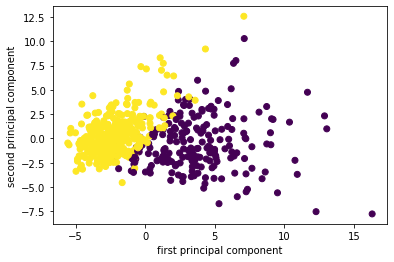

In [20]:
plt.scatter(pca_ss_data[:,0] , pca_ss_data[:,1] , c = cancer_target)
plt.xlabel('first principal component')
plt.ylabel('second principal component')


In [21]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724])

Text(0, 0.5, 'cmulative_explained_variance_ratio')

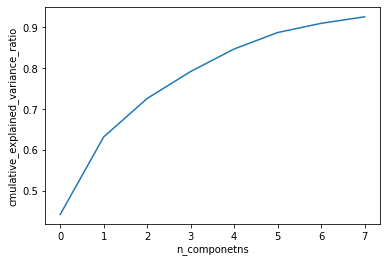

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_componetns')
plt.ylabel('cmulative_explained_variance_ratio')


The first and second components correspond to 63% of the entire dataset. 

In [25]:
!pip install mglearn   #Helper functions for the book 'Introduction to machine learning with Python'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 3.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=a6ec2f3658806f9d4476a2a1f2e7c0aa0bbae78413c6a1a52b306545c5d8c217
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [26]:
import mglearn

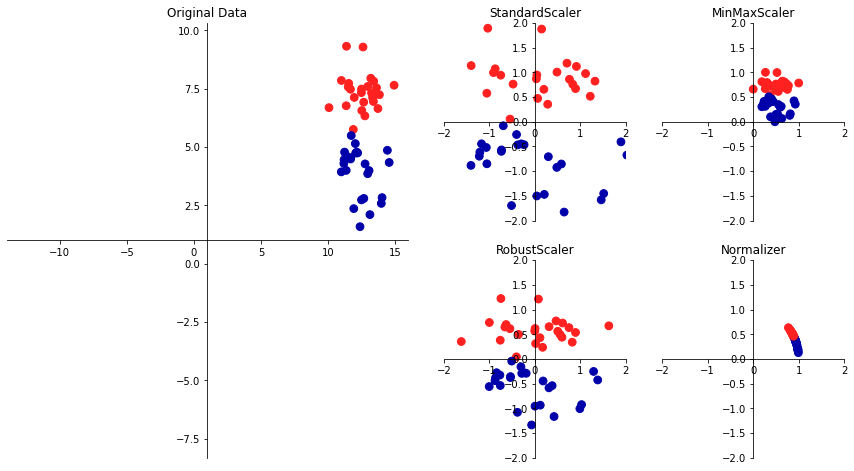

In [28]:
mglearn.plots.plot_scaling()

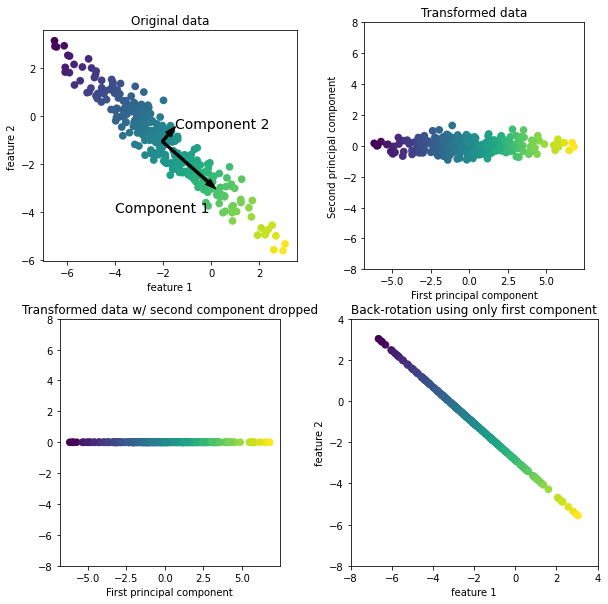

In [29]:
mglearn.plots.plot_pca_illustration()

# PCA - Minst data

In [69]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [70]:
target = mnist.target
target.shape

(70000,)

In [71]:
data = mnist.data
data.shape

(70000, 784)

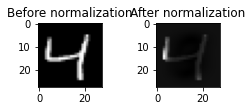

Number is:  4


In [87]:
index = 2
img = data.to_numpy()[index]
img = img.reshape(28,28)
plt.subplot(3,3,1)
plt.imshow(img , cmap='gray')
plt.title('Before normalization')


scaled_data = StandardScaler().fit_transform(data)

img = np.matrix(scaled_data[index]).reshape(28,28)
img = img.reshape(28,28)
plt.subplot(3,3,2)
plt.imshow(img , cmap='gray')
plt.title('After normalization')

plt.show()
print ('Number is: ' ,target[index])


# Kernal PCA - make circles

Although PCA is a linear model, it may **not give successful results in non-linear** situations. Kernel PCA is a method, also called kernel-trick, that can separate data non-linearly.

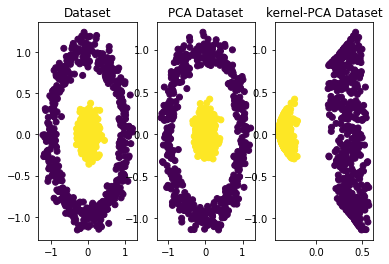

In [41]:

from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

x,y = make_circles(n_samples=1000, factor=.1, noise=0.1, random_state=47)
plt.subplot(1,3,1)
plt.scatter(x[:,0],x[:,1],c=y)
plt.title("Dataset")


pca = PCA(n_components=2)
pca_x=pca.fit_transform(x)
plt.subplot(1,3,2)
plt.scatter(pca_x[:,0],pca_x[:,1],c=y)
plt.title("PCA Dataset")



kpca = KernelPCA(kernel='rbf', gamma=1)
kpca_x=kpca.fit_transform(x)
plt.subplot(1,3,3)
plt.scatter(kpca_x[:,0],pca_x[:,1],c=y)
plt.title("kernel-PCA Dataset")

plt.show()

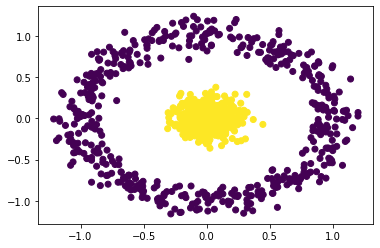